In [0]:

spark

from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType #for define the variable type
from pyspark.sql.functions import col, when, sum, avg, row_number,lit,countDistinct,count
from pyspark.sql.window import Window
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession 

#create session
spark = SparkSession.builder.appName("Az Trucking Risk Analysis").getOrCreate()


from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

# Initialize the schema with the static fields
trucks_schema = StructType([
    StructField("driverid", StringType(), True),
    StructField("truckid", StringType(), True),
    StructField("model", StringType(), True)
])

# Add fields dynamically for each month's mileage and gas
# The months list includes every month from the data as observed in the sample
months = [
    "jun13", "may13", "apr13", "mar13", "feb13", "jan13",
    "dec12", "nov12", "oct12", "sep12", "aug12", "jul12", "jun12", "may12", "apr12", "mar12", "feb12", "jan12",
    "dec11", "nov11", "oct11", "sep11", "aug11", "jul11", "jun11", "may11", "apr11", "mar11", "feb11", "jan11",
    "dec10", "nov10", "oct10", "sep10", "aug10", "jul10", "jun10", "may10", "apr10", "mar10", "feb10", "jan10",
    "dec09", "nov09", "oct09", "sep09", "aug09", "jul09", "jun09", "may09", "apr09", "mar09", "feb09", "jan09"
]

# Iterate through each month and add two fields: one for miles and one for gas
for month in months:
    trucks_schema.add(StructField(f"{month}_miles", IntegerType(), True))
    trucks_schema.add(StructField(f"{month}_gas", IntegerType(), True))


trucks_df = spark.read.schema(trucks_schema).format("csv").option("header","true").load("s3://trucks-data/trucks.csv")    

# shows 10 rows of the truck dataframe
trucks_df.show(10)

# creates the geolocationschema
geolocation_schema = StructType([
    StructField("truckid", StringType(), True),
    StructField("driverid", StringType(), True),
    StructField("event", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("city", StringType(), True),
    StructField("state", StringType(), True),
    StructField("velocity", IntegerType(), True),
    StructField("event_ind", IntegerType(), True),
    StructField("idling_ind", IntegerType(), True)
])

#   Loading the data from the amazon S3 bucket
geolocation_df = spark.read.schema(geolocation_schema).format("csv").option("header","true").load("s3://trucks-data/geolocation.csv")    

# Shows 5 rows of the geolocation table
geolocation_df.show(5)



+--------+-------+------------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-

In [0]:

# Non normal event filter data and add one column occurance in dataframe
non_normal_event_data_df = geolocation_df.filter(col("event") != "normal").withColumn("Occurance",lit("1"))

non_normal_event_data_df.show(5)

# Driver's Total Miles (Driver ae chalavela total miles)
driver_total_miles_df = trucks_df.groupBy("driverid").agg(
    sum(col("jun13_miles") + col("may13_miles") + col("apr13_miles") +
        col("mar13_miles") + col("feb13_miles") + col("jan13_miles") +
        col("dec12_miles") + col("nov12_miles") + col("oct12_miles") +
        col("sep12_miles") + col("aug12_miles") + col("jul12_miles") +
        col("jun12_miles") + col("may12_miles") + col("apr12_miles") +
        col("mar12_miles") + col("feb12_miles") + col("jan12_miles") +
        col("dec11_miles") + col("nov11_miles") + col("oct11_miles") +
        col("sep11_miles") + col("aug11_miles") + col("jul11_miles") +
        col("jun11_miles") + col("may11_miles") + col("apr11_miles") +
        col("mar11_miles") + col("feb11_miles") + col("jan11_miles") +
        col("dec10_miles") + col("nov10_miles") + col("oct10_miles") +
        col("sep10_miles") + col("aug10_miles") + col("jul10_miles") +
        col("jun10_miles") + col("may10_miles") + col("apr10_miles") +
        col("mar10_miles") + col("feb10_miles") + col("jan10_miles") +
        col("dec09_miles") + col("nov09_miles") + col("oct09_miles") +
        col("sep09_miles") + col("aug09_miles") + col("jul09_miles") +
        col("jun09_miles") + col("may09_miles") + col("apr09_miles") +
        col("mar09_miles") + col("feb09_miles") + col("jan09_miles")).alias("driver's_total_miles"),
)

# displays the 
display(driver_total_miles_df)

# Driver's total gas usage
driver_total_gas_df = trucks_df.groupBy("driverid").agg(
    sum(col("jun13_gas") + col("may13_gas") + col("apr13_gas") +
        col("mar13_gas") + col("feb13_gas") + col("jan13_gas") +
        col("dec12_gas") + col("nov12_gas") + col("oct12_gas") +
        col("sep12_gas") + col("aug12_gas") + col("jul12_gas") +
        col("jun12_gas") + col("may12_gas") + col("apr12_gas") +
        col("mar12_gas") + col("feb12_gas") + col("jan12_gas") +
        col("dec11_gas") + col("nov11_gas") + col("oct11_gas") +
        col("sep11_gas") + col("aug11_gas") + col("jul11_gas") +
        col("jun11_gas") + col("may11_gas") + col("apr11_gas") +
        col("mar11_gas") + col("feb11_gas") + col("jan11_gas") +
        col("dec10_gas") + col("nov10_gas") + col("oct10_gas") +
        col("sep10_gas") + col("aug10_gas") + col("jul10_gas") +
        col("jun10_gas") + col("may10_gas") + col("apr10_gas") +
        col("mar10_gas") + col("feb10_gas") + col("jan10_gas") +
        col("dec09_gas") + col("nov09_gas") + col("oct09_gas") +
        col("sep09_gas") + col("aug09_gas") + col("jul09_gas") +
        col("jun09_gas") + col("may09_gas") + col("apr09_gas") +
        col("mar09_gas") + col("feb09_gas") + col("jan09_gas")).alias("driver's_total_gas_usage"),
)

display(driver_total_gas_df)

# Gives the total non normal events(rules violation done by drivers)
total_events = non_normal_event_data_df.groupBy("driverid").agg(
    sum("Occurance").alias("TotalOccuranceByDrivers"),
)
total_events.sort(col("TotalOccuranceByDrivers").desc()).show(5)

top_5_occurance_df = total_events.orderBy(total_events['TotalOccuranceByDrivers'].desc()).limit(5)

display(top_5_occurance_df)

# joins two table geolocation data frame and top most 5 drivers who occured more events
joined_Event_df = top_5_occurance_df.join(geolocation_df, 'driverid', 'left').filter(col("event") != "normal")
display(joined_Event_df)

# Join the two DataFrames on the 'driverid' column
joined_df = driver_total_gas_df.join(driver_total_miles_df, 'driverid', 'inner')

# Select particular columns from the joined DataFrame
selected_columns_df = joined_df.select(joined_df['driverid'],
                                       joined_df["driver's_total_gas_usage"],
                                       joined_df["driver's_total_miles"])
display(selected_columns_df)


# Top 5 Efficient Drivers 
efficiency_df = joined_df.withColumn("efficiency", col("driver's_total_miles") / col("driver's_total_gas_usage"))
efficiency_df.sort(col("efficiency").desc()).show(5)


+-------+--------+--------------------+---------+-----------+-----------+----------+--------+---------+----------+---------+
|truckid|driverid|               event| latitude|  longitude|       city|     state|velocity|event_ind|idling_ind|Occurance|
+-------+--------+--------------------+---------+-----------+-----------+----------+--------+---------+----------+---------+
|    A40|     A40|           overspeed|37.957702| -121.29078|   Stockton|California|      77|        1|         0|        1|
|     A5|      A5|unsafe following ...|41.526509|-124.038407|    Klamath|California|      33|        1|         0|        1|
|    A48|     A48|           overspeed|38.752124|-121.288006|  Roseville|California|      77|        1|         0|        1|
|    A94|     A94|unsafe following ...|37.941325|-122.484704|San Quentin|California|       0|        1|         1|        1|
|    A49|     A49|      lane departure|39.150171|-123.207783|      Ukiah|California|      41|        1|         0|        1|


driverid,driver's_total_miles
A23,639663
A47,623836
A76,653351
A65,658913
A9,665456
A46,640660
A92,618049
A62,626253
A35,637069
A6,648479


driverid,driver's_total_gas_usage
A23,139793
A47,132669
A76,142455
A65,144978
A9,124000
A46,125491
A92,109351
A62,110377
A35,112177
A6,115620


+--------+-----------------------+
|driverid|TotalOccuranceByDrivers|
+--------+-----------------------+
|     A97|                   20.0|
|     A73|                   10.0|
|     A35|                    9.0|
|     A50|                    9.0|
|      A5|                    9.0|
+--------+-----------------------+
only showing top 5 rows



driverid,TotalOccuranceByDrivers
A97,20.0
A73,10.0
A35,9.0
A5,9.0
A50,9.0


driverid,TotalOccuranceByDrivers,truckid,event,latitude,longitude,city,state,velocity,event_ind,idling_ind
A5,9.0,A5,unsafe following distance,41.526509,-124.038407,Klamath,California,33,1,0
A97,20.0,A97,overspeed,38.440467,-122.714431,Santa Rosa,California,33,1,0
A73,10.0,A73,overspeed,35.373292,-119.018712,Bakersfield,California,81,1,0
A50,9.0,A50,unsafe following distance,32.715329,-117.157255,San Diego,California,43,1,0
A73,10.0,A73,overspeed,37.962146,-122.345526,San Pablo,California,90,1,0
A73,10.0,A73,lane departure,39.230151,-121.136075,Rough and Ready,California,68,1,0
A50,9.0,A50,overspeed,35.373292,-119.018712,Bakersfield,California,89,1,0
A97,20.0,A97,lane departure,34.106676,-117.806726,San Dimas,California,0,0,1
A5,9.0,A5,overspeed,38.716687,-121.364422,Antelope,California,91,1,0
A97,20.0,A97,lane departure,37.639097,-120.996878,Modesto,California,40,1,0


driverid,driver's_total_gas_usage,driver's_total_miles
A23,139793,639663
A47,132669,623836
A76,142455,653351
A65,144978,658913
A9,124000,665456
A46,125491,640660
A92,109351,618049
A62,110377,626253
A35,112177,637069
A6,115620,648479


+--------+------------------------+--------------------+-----------------+
|driverid|driver's_total_gas_usage|driver's_total_miles|       efficiency|
+--------+------------------------+--------------------+-----------------+
|     A18|                  108294|              656474|6.061960958132492|
|     A79|                  108853|              655093|6.018143735129027|
|     A61|                  108517|              644254|5.936894680096206|
|     A30|                  109561|              647312|5.908233769315724|
|     A60|                  112248|              653030| 5.81774285510655|
+--------+------------------------+--------------------+-----------------+
only showing top 5 rows



+--------+------------------------+--------------------+-----------------+
|driverid|driver's_total_gas_usage|driver's_total_miles|       efficiency|
+--------+------------------------+--------------------+-----------------+
|     A18|                  108294|              656474|6.061960958132492|
|     A79|                  108853|              655093|6.018143735129027|
|     A61|                  108517|              644254|5.936894680096206|
|     A30|                  109561|              647312|5.908233769315724|
|     A60|                  112248|              653030| 5.81774285510655|
+--------+------------------------+--------------------+-----------------+
only showing top 5 rows



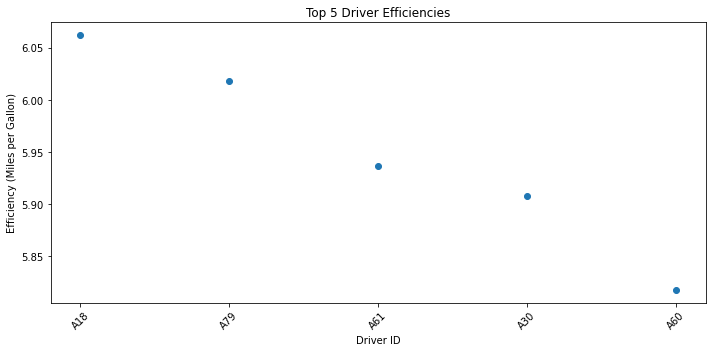

In [0]:
# Top 5 Efficient Drivers 
efficiency_df = joined_df.withColumn("efficiency", col("driver's_total_miles") / col("driver's_total_gas_usage"))
efficiency_df.sort(col("efficiency").desc()).show(5)

# Sort the data by efficiency in descending order and select the top 5
top_5_efficiencies_df = efficiency_df.orderBy('efficiency', ascending=False).limit(5)

# Collect the particular data of  the top 5 drivers 
top_5_driver_efficiency_data = top_5_efficiencies_df.select("driverid", "efficiency").collect()

# Extract driver IDs and efficiencies
driver_ids = [row['driverid'] for row in top_5_driver_efficiency_data]
efficiencies = [row['efficiency'] for row in top_5_driver_efficiency_data]

plt.show()
# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(driver_ids, efficiencies)
plt.xlabel('Driver ID')
plt.ylabel('Efficiency (Miles per Gallon)')
plt.title('Top 5 Driver Efficiencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
from pyspark.sql.functions import col

driver_ids_total = top_5_occurance_df.select("driverid").collect()
driver_ids_total = [row.driverid for row in driver_ids_total]
print(driver_ids_total)
for driver_id in driver_ids_total:
    print(driver_id)
    driver_events = geolocation_df.filter((col("driverid") == driver_id) & (col("event") != "normal"))

    # Group by event and count occurrences
    event_count_for_driver = driver_events.groupBy("event").agg(
        count("*").alias("event_count")
    )
    # Show the results
    event_count_for_driver.show()


['A97', 'A73', 'A35', 'A5', 'A50']
A97
+--------------------+-----------+
|               event|event_count|
+--------------------+-----------+
|      lane departure|         11|
|unsafe tail distance|          3|
|unsafe following ...|          1|
|           overspeed|          5|
+--------------------+-----------+

A73
+--------------------+-----------+
|               event|event_count|
+--------------------+-----------+
|      lane departure|          2|
|unsafe following ...|          5|
|           overspeed|          3|
+--------------------+-----------+

A35
+--------------------+-----------+
|               event|event_count|
+--------------------+-----------+
|      lane departure|          3|
|unsafe tail distance|          1|
|unsafe following ...|          3|
|           overspeed|          2|
+--------------------+-----------+

A5
+--------------------+-----------+
|               event|event_count|
+--------------------+-----------+
|      lane departure|          1|
|u

In [0]:
values1 = event_count_for_driver.select("event").collect()
values1= [row.event for row in values1]
values2 = event_count_for_driver.select("event_count").collect()
values2= [row.event_count for row in values2]
categories= driver_ids_total

print(values1)
print(values2)
print(categories)

['lane departure', 'unsafe tail distance', 'unsafe following distance', 'overspeed']
[3, 1, 3, 2]
['A97', 'A73', 'A35', 'A5', 'A50']


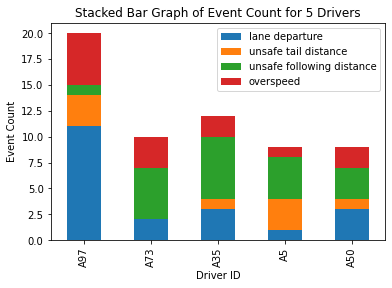

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'DriverID': ['A97', 'A73', 'A35', 'A5', 'A50'],
    'lane departure': [11, 2, 3, 1, 3],
    'unsafe tail distance': [3, 0, 1, 3, 1],
    'unsafe following distance': [1, 5, 6, 4, 3],
    'overspeed': [5, 3, 2, 1, 2]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

df.set_index('DriverID', inplace=True)

# Plotting
fig, ax = plt.subplots()

# Stacked bar plot
df.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Driver ID')
ax.set_ylabel('Event Count')
ax.set_title('Stacked Bar Graph of Event Count for 5 Drivers')

# Show plot
plt.show()


Event,count
lane departure,152
unsafe tail distance,65
unsafe following distance,150
overspeed,90


['lane departure', 'unsafe tail distance', 'unsafe following distance', 'overspeed']
[152, 65, 150, 90]


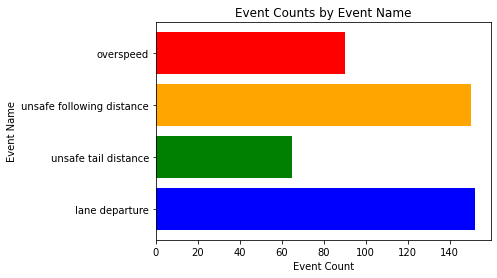

In [0]:
# counts the non normal event done by all the drivers or distribution of the non normal events
event_counts = geolocation_df.filter(col("event") != "normal").groupBy("Event").count() 
display(event_counts)

Xvalue = event_counts.select("event").collect()
Xvalue= [row.event for row in Xvalue]
print(Xvalue)
Yvalue = event_counts.select("count").collect()
Yvalue= [row['count'] for row in Yvalue]
print(Yvalue)
# colors for each bar
colors = ['blue', 'green', 'orange', 'red']

# Creates horizontal bar plot
plt.barh(Xvalue, Yvalue, color=colors)

# Add labels and title
plt.xlabel('Event Count')
plt.ylabel('Event Name')
plt.title('Event Counts by Event Name')

# Show plot
plt.show()

driverid,TotalOccuranceByDrivers,truckid,event,latitude,longitude,city,state,velocity,event_ind,idling_ind
A97,20.0,A97,overspeed,38.440467,-122.714431,Santa Rosa,California,33,1,0
A97,20.0,A97,lane departure,34.106676,-117.806726,San Dimas,California,0,0,1
A97,20.0,A97,lane departure,37.639097,-120.996878,Modesto,California,40,1,0
A97,20.0,A97,unsafe tail distance,34.106676,-117.806726,San Dimas,California,45,1,0
A97,20.0,A97,overspeed,38.130197,-121.272447,Lodi,California,88,1,0
A97,20.0,A97,lane departure,37.005782,-121.568275,Gilroy,California,31,1,0
A97,20.0,A97,lane departure,38.130197,-121.272447,Lodi,California,45,1,0
A97,20.0,A97,lane departure,36.852455,-121.401602,Hollister,California,68,0,0
A97,20.0,A97,lane departure,39.017396,-122.057748,Arbuckle,California,44,0,0
A97,20.0,A97,overspeed,38.693723,-119.779683,Markleeville,California,89,1,0


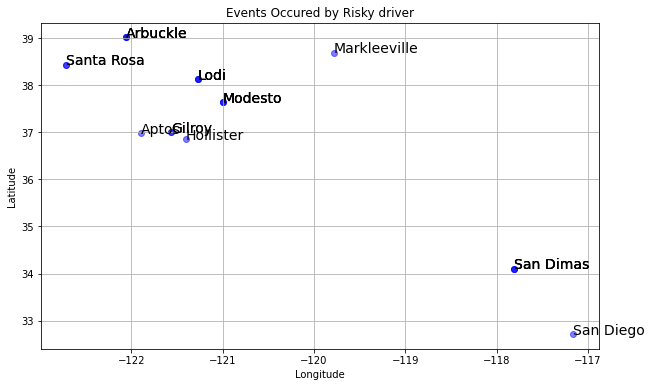

In [0]:
# top 1 drivers area where that drive done non normal events
import matplotlib.pyplot as plt

top_1_occurance_df = total_events.orderBy(total_events['TotalOccuranceByDrivers'].desc()).limit(1)

# joins the top 1 drive occurance and geolocation dataframe
details_of_top_1_occurance = top_1_occurance_df.join(geolocation_df, 'driverid', 'left').filter(col("event") != "normal")
display(details_of_top_1_occurance)

# give the name of the cities for a person
city_names_for_person = details_of_top_1_occurance.select("city").collect()
city_names_for_person= [row.city for row in city_names_for_person]

# gives the latitude of all the cities
latitude_for_person = details_of_top_1_occurance.select("latitude").collect()
latitude_for_person= [row.latitude for row in latitude_for_person]

# gives the longtitude of all the cities
longitude_for_person = details_of_top_1_occurance.select("longitude").collect()
longitude_for_person= [row.longitude for row in longitude_for_person]

plt.figure(figsize=(10, 6))
plt.scatter(longitude_for_person, latitude_for_person, color='blue', alpha=0.5)
for i, city in enumerate(city_names_for_person):
    plt.text(longitude_for_person[i], latitude_for_person[i], city, fontsize=14)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Events Occured by Risky driver')
plt.grid(True)
# 
plt.show()

truckid,driverid,event,latitude,longitude,city,state,velocity,event_ind,idling_ind,Occurance
A40,A40,overspeed,37.957702,-121.29078,Stockton,California,77,1,0,1
A5,A5,unsafe following distance,41.526509,-124.038407,Klamath,California,33,1,0,1
A48,A48,overspeed,38.752124,-121.288006,Roseville,California,77,1,0,1
A94,A94,unsafe following distance,37.941325,-122.484704,San Quentin,California,0,1,1,1
A49,A49,lane departure,39.150171,-123.207783,Ukiah,California,41,1,0,1
A97,A97,overspeed,38.440467,-122.714431,Santa Rosa,California,33,1,0,1
A75,A75,lane departure,34.106676,-117.806726,San Dimas,California,41,1,0,1
A9,A9,unsafe tail distance,32.715329,-117.157255,San Diego,California,63,1,0,1
A80,A80,unsafe tail distance,37.77493,-122.419416,San Francisco,California,28,1,0,1
A91,A91,unsafe following distance,38.440467,-122.714431,Santa Rosa,California,43,1,0,1


+------------+----------------------+
|        city|TotalOccuranceByCities|
+------------+----------------------+
|  Santa Rosa|                  53.0|
|     Willits|                  28.0|
|Apple Valley|                  25.0|
|    Arbuckle|                  21.0|
|    Antelope|                  19.0|
+------------+----------------------+
only showing top 5 rows



city,TotalOccuranceByCities
Santa Rosa,53.0
Willits,28.0
Apple Valley,25.0
Arbuckle,21.0
Antelope,19.0


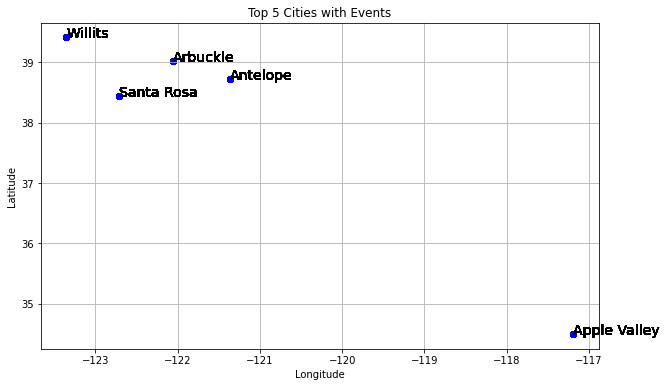

In [0]:

# Gives the total non normal events(rules violation done by drivers)

display(non_normal_event_data_df)
total_events_cities = non_normal_event_data_df.groupBy("city").agg(
    sum("Occurance").alias("TotalOccuranceByCities"),
)
# sorting of the data by number of the occurance of the cities
total_events_cities.sort(col("TotalOccuranceByCities").desc()).show(5)

top_5_cities_events = total_events_cities.orderBy(total_events_cities['TotalOccuranceByCities'].desc()).limit(5)

# displays top 5 cities where the non normal event occured more
display(top_5_cities_events)

details_of_top_5_cities_events = top_5_cities_events.join(geolocation_df, 'city', 'inner').filter(col("event") != "normal")

import matplotlib.pyplot as plt

city_names = details_of_top_5_cities_events.select("city").collect()
city_names= [row.city for row in city_names]

latitude = details_of_top_5_cities_events.select("latitude").collect()
latitude= [row.latitude for row in latitude]

longitude = details_of_top_5_cities_events.select("longitude").collect()
longitude= [row.longitude for row in longitude]

plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, color='blue', alpha=0.5)
for i, city in enumerate(city_names):
    plt.text(longitude[i], latitude[i], city, fontsize=14)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 5 Cities with Events')
plt.grid(True)
plt.show()


driverid,driver's_total_miles,TotalOccuranceByDrivers
A23,639663,5.0
A76,653351,3.0
A47,623836,2.0
A65,658913,1.0
A9,665456,6.0
A46,640660,1.0
A92,618049,7.0
A62,626253,3.0
A35,637069,9.0
A6,648479,1.0


driverid,driver's_total_miles,TotalOccuranceByDrivers,RiskFactor
A97,631199,20.0,31.685728272700054
A73,642222,10.0,15.57093964392375
A35,637069,9.0,14.127198152790356
A50,640069,9.0,14.060984050157092
A5,676574,9.0,13.30231430708245


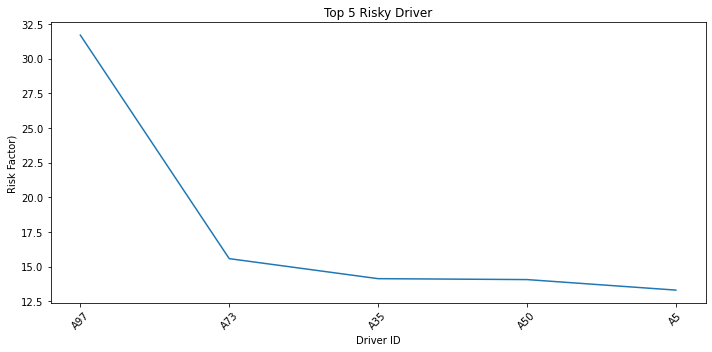

Out[59]: <bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7f9952708310>>

In [0]:
# Top 5 Risky drivers

# joins the total miles and total event data frame
new_df = driver_total_miles_df.join(total_events, 'driverid', 'inner')
display(new_df)

# calculate the risk factor and add the column in the data frame
risk_factor_df = new_df.withColumn("RiskFactor", (col("TotalOccuranceByDrivers") / col("driver's_total_miles") * 1000000))


top_5_risky_driver = risk_factor_df.orderBy(risk_factor_df['RiskFactor'].desc()).limit(5)
display(top_5_risky_driver)

# Collect the data to the driver 
top_5_risky_driver_data = top_5_risky_driver.select("driverid", "RiskFactor").collect()

# Extract driver IDs and Risk factor
driver_ids = [row['driverid'] for row in top_5_risky_driver_data]
RiskFactor = [row['RiskFactor'] for row in top_5_risky_driver_data]

plt.show()
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(driver_ids, RiskFactor)
plt.xlabel('Driver ID')
plt.ylabel('Risk Factor)')
plt.title('Top 5 Risky Driver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

spark.stop